# DSAI-Basketball
jupyter notebook to analyze a dataset of nba basketball players statistics

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#setting up figure size
plt.rcParams['figure.figsize'] = (10, 8)

basketball = pd.read_csv("./data/NBA_Player_Stats_2.csv", na_values=['Not Provided'])
basketball.sample(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
6041,179,Luther Head,SG,26,MIA,10,0,17.6,1.6,4.3,...,2.2,2.5,2.3,1.1,0.1,0.9,2.2,4.3,2008-09,False
2017,414,Samaki Walker,PF,24,SAS,61,1,15.8,2.0,4.1,...,2.9,4.0,0.5,0.2,0.7,1.1,1.7,5.3,2000-01,False
5781,430,Mike Wilks,PG,28,DEN,8,0,15.3,1.3,2.9,...,1.0,1.5,0.8,0.6,0.0,0.6,1.1,3.0,2007-08,False
2531,432,Scott Williams,PF,33,DEN,41,16,18.0,2.1,5.3,...,3.1,5.1,0.3,0.4,0.8,0.9,2.4,4.9,2001-02,False
6109,235,Linas Kleiza,SF,24,DEN,82,7,22.2,3.5,7.9,...,2.9,4.0,0.8,0.4,0.2,1.0,1.9,9.9,2008-09,False
10721,194,Nenê,C,34,HOU,67,8,17.9,3.7,5.9,...,2.8,4.2,1.0,0.8,0.6,1.1,2.4,9.1,2016-17,False
5098,340,Chris Quinn,PG,23,MIA,42,1,9.7,1.1,3.1,...,0.6,0.7,1.5,0.4,0.0,0.5,0.8,3.4,2006-07,False
95,82,Terry Cummings,PF,36,PHI,44,2,14.9,2.2,4.8,...,2.1,3.4,0.5,0.5,0.1,0.4,2.3,5.3,1997-98,False
10483,468,Brandan Wright,PF,28,MEM,12,2,17.7,2.9,4.3,...,2.4,3.6,0.5,0.4,1.3,0.8,1.8,6.9,2015-16,False
10940,374,Willie Reed,C,26,MIA,71,5,14.5,2.3,4.0,...,2.9,4.7,0.4,0.3,0.7,0.4,1.9,5.3,2016-17,False


In [24]:
def get_first(position):
    return position.split('-')[0]

In [25]:
df = pd.DataFrame(data=basketball)
df['PosN'] = df.Pos.apply(get_first)
pts_higher_ten = df[df['PTS'] >= 10]
sns.set_palette(sns.color_palette("pastel"))

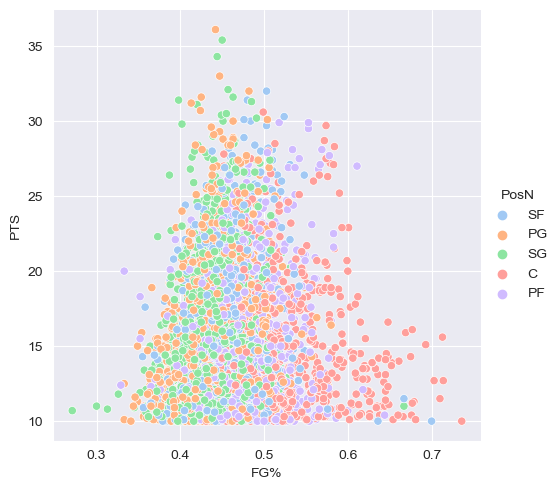

In [26]:
sns.relplot(data=pts_higher_ten, x="FG%", y="PTS", hue="PosN")

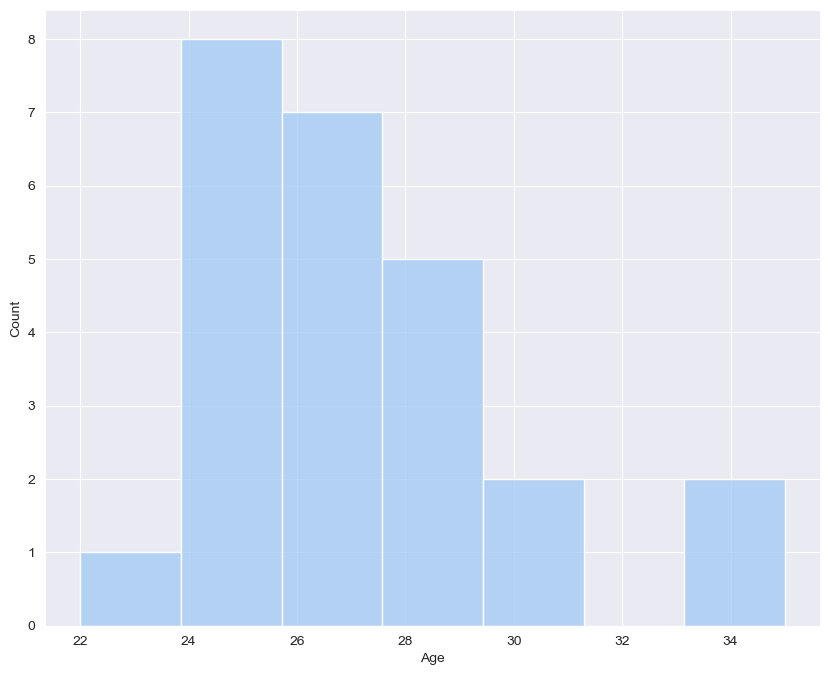

In [27]:
mvp = df[df['MVP'] == True]
sns.histplot(data=mvp, x="Age")

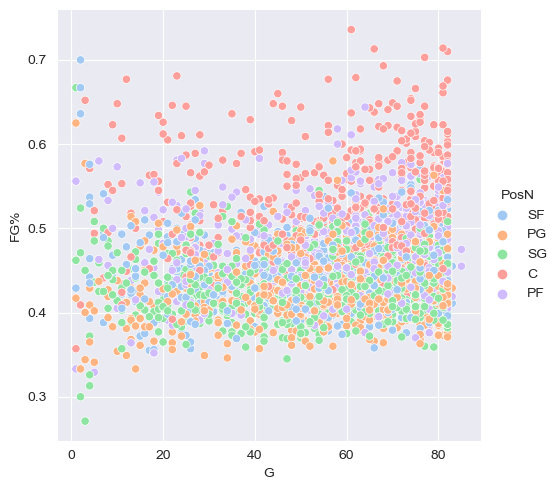

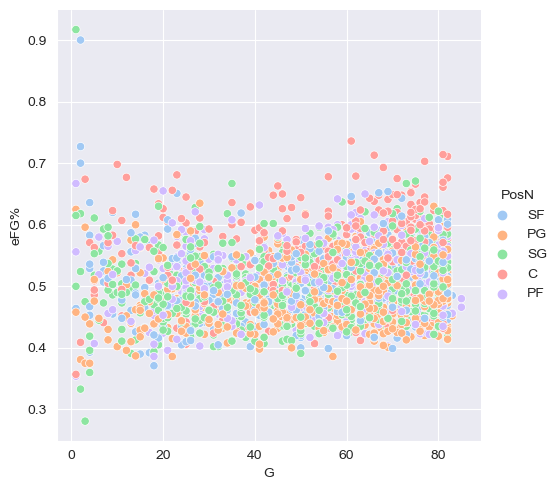

In [28]:
sns.relplot(data=pts_higher_ten, x="G", y="FG%", hue="PosN")
sns.relplot(data=pts_higher_ten, x="G", y="eFG%", hue="PosN")

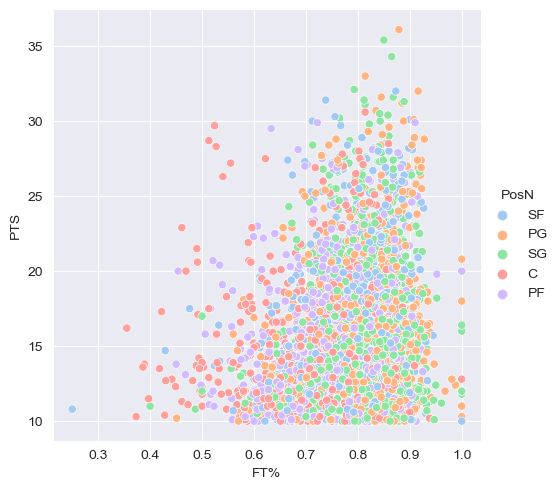

In [29]:
sns.relplot(data=pts_higher_ten, x="FT%", y="PTS", hue="PosN")

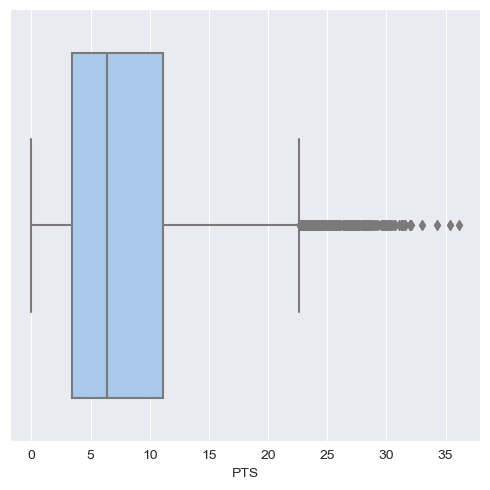

In [32]:
sns.catplot(data=df, x='PTS', kind='box')

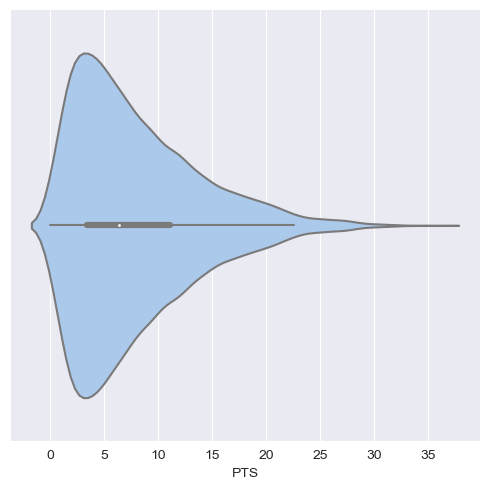

In [33]:
sns.catplot(data=df, kind='violin', x='PTS')

In [47]:
more_then_15_minutes = df[df['MP'] > 15]
more_then_15_minutes.groupby('PosN')[['PTS', 'AST', 'TRB', 'STL', 'BLK',]].mean()

,PTS,AST,TRB,STL,BLK
PosN,,,,,
C,9.791131,1.313054,6.850781,0.605434,1.118364
PF,10.750166,1.607064,5.963852,0.725993,0.653035
PG,10.915288,4.613770,2.841623,1.003351,0.185654
SF,10.995567,1.933221,4.166049,0.869921,0.412963
SG,11.549503,2.443042,3.110288,0.880616,0.268091


In [60]:
df['STK'] = df['STL'] + df['BLK']
stocks = df.sort_values(by=['STK'], ascending=False).head(25)
stocks.loc[:, ['Player','Season','STK', 'MP']]

,Player,Season,STK,MP
10994,Edy Tavares,2016-17,6.0,24.0
3542,Rasheed Wallace,2003-04,6.0,42.0
3443,Theo Ratliff,2003-04,5.2,31.8
2512,Ben Wallace*,2001-02,5.2,36.5
3879,Andrei Kirilenko,2004-05,4.9,32.9
68,Marcus Camby,1997-98,4.8,31.8
3537,Ben Wallace*,2003-04,4.8,37.7
5308,Marcus Camby,2007-08,4.7,34.9
4443,Andrei Kirilenko,2005-06,4.7,37.7
3291,Andrei Kirilenko,2003-04,4.7,37.1
